In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Check DIrectory saat ini
os.getcwd()

'C:\\Users\\LENOVO\\Documents\\Tutorial Data Science\\supervised_learning-master\\Magang Rakamin\\magang'

In [4]:
#Check file apa saja yang ada di Directory saat ini
os.listdir()

['.ipynb_checkpoints',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'Dataset_Description__Task_5-2a9c29ec-455a-450e-a631-8782e792b88d.pdf',
 'home-credit-default-risk.zip',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'JAWABAN MAGANG.ipynb',
 'Pedoman_Pembuatan_PPT__Task_5__HCI-386c286f-2554-4d1c-8b93-72634b2babbd.pdf',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [5]:
# Membaca csv file dan melihat 5 baris pertama
loan_data = pd.read_csv('application_train.csv')
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
isTarget = [np.count_nonzero(loan_data['TARGET'] == 0), np.count_nonzero(loan_data['TARGET'] == 1) ]
label = ['lancar', 'tidak lancar']
plt.title('kelancaran pembayaran')
plt.pie(isTarget, labels= label, radius=0.9, startangle=60, autopct='%.1f%%', shadow=True);
plt.legend()

In [ ]:
# Memilih kolom-kolom yang akan digunakan untuk heatmap
selected_columns = ['NAME_CONTRACT_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE', 
                    'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 
                    'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY']

# Mengambil data untuk kolom-kolom yang dipilih dari dataframe loan_data
selected_data = loan_data[selected_columns]

# Menghitung korelasi antara kolom-kolom yang dipilih
correlation_matrix = selected_data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='bwr', cbar=False, annot=True)
plt.title('Korelasi antara Kolom yang Dipilih')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataframe dengan kolom-kolom yang diberikan


# Membuat dataframe dari data di atas


# Menghitung jumlah nasabah gagal bayar untuk setiap jenis pendidikan
nasabah_gagal_bayar = loan_data.groupby('AMT_CREDIT_BINS')['TARGET'].sum()

# Membuat plot
plt.figure(figsize=(10, 6))
nasabah_gagal_bayar.plot(kind='bar')
plt.title('Distribusi Total Pinjaman (AMT_CREDIT)')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Nasabah')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()


In [6]:
# Melihat info seluruh kolom
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Melihat total baris dan kolom
loan_data.shape

(307511, 122)

In [175]:
# Melihat distribusi 0 dan 1
loan_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [176]:
loan_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

# Missing Values

Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [8]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
COMMONAREA_AVG,0.698723
COMMONAREA_MEDI,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MEDI,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MODE,0.683550


In [9]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5,  axis=1, inplace=True)

In [10]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


# Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = loan_data.drop('TARGET', axis=1)
y = loan_data['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state=42)

In [13]:
y_train.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [14]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

# Data Cleaning

In [15]:
# Terdapat 80 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape


(246008, 80)

In [16]:
X_train.FLAG_DOCUMENT_2

181648    0
229245    0
122525    0
306311    0
300658    0
         ..
31304     0
121193    0
248504    0
175469    0
285162    0
Name: FLAG_DOCUMENT_2, Length: 246008, dtype: int64

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 181648 to 285162
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    246008 non-null  int64  
 1   NAME_CONTRACT_TYPE            246008 non-null  object 
 2   CODE_GENDER                   246008 non-null  object 
 3   FLAG_OWN_CAR                  246008 non-null  object 
 4   FLAG_OWN_REALTY               246008 non-null  object 
 5   CNT_CHILDREN                  246008 non-null  int64  
 6   AMT_INCOME_TOTAL              246008 non-null  float64
 7   AMT_CREDIT                    246008 non-null  float64
 8   AMT_ANNUITY                   245998 non-null  float64
 9   AMT_GOODS_PRICE               245787 non-null  float64
 10  NAME_TYPE_SUITE               244979 non-null  object 
 11  NAME_INCOME_TYPE              246008 non-null  object 
 12  NAME_EDUCATION_TYPE           246008 no

In [18]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

for col in X_train.select_dtypes(include= ['object','bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['F' 'M' 'XNA']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['N' 'Y']

NAME_TYPE_SUITE
['Unaccompanied' 'Spouse, partner' 'Family' 'Other_B' nan 'Children'
 'Group of people' 'Other_A']

NAME_INCOME_TYPE
['Commercial associate' 'Working' 'Pensioner' 'State servant'
 'Businessman' 'Unemployed' 'Student' 'Maternity leave']

NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'
 'Unknown']

NAME_HOUSING_TYPE
['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Co-op apartment' 'Office apartment']

OCCUPATION_TYPE
['Laborers' 'Drivers' 'Accountants' nan 'Sales staff'
 'High skill tech staff' 'Medicine staff' 'Core staff' 'Security staff'
 'Managers' 'Waiters/barmen staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'IT st

In [19]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [20]:
X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
X_train['FLAG_OWN_REALTY'] =X_train['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [21]:
X_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,310536,Cash loans,F,0,0,2,90000.0,227520.0,13189.5,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
229245,365516,Cash loans,M,1,1,0,90000.0,161730.0,13095.0,135000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
122525,242055,Cash loans,M,0,1,0,135000.0,728847.0,26307.0,553500.0,...,0,0,0,0,0.0,0.0,2.0,0.0,0.0,2.0
306311,454894,Cash loans,M,0,0,0,135000.0,474183.0,34636.5,391500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
300658,448321,Cash loans,F,0,1,0,180000.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31304,136325,Revolving loans,F,0,1,1,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
121193,240509,Cash loans,F,0,0,0,157500.0,272520.0,21528.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
248504,387513,Cash loans,F,0,0,0,90000.0,246357.0,24493.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
175469,303331,Cash loans,F,0,1,0,112500.0,810000.0,26901.0,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [22]:
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
X_test['FLAG_OWN_REALTY'] =X_test['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [23]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 256571 to 268861
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   FLAG_OWN_CAR      61503 non-null  int64
 1   FLAG_OWN_REALTY   61503 non-null  int64
 2   FLAG_MOBIL        61503 non-null  int64
 3   FLAG_EMP_PHONE    61503 non-null  int64
 4   FLAG_WORK_PHONE   61503 non-null  int64
 5   FLAG_CONT_MOBILE  61503 non-null  int64
 6   FLAG_PHONE        61503 non-null  int64
 7   FLAG_EMAIL        61503 non-null  int64
 8   FLAG_DOCUMENT_2   61503 non-null  int64
 9   FLAG_DOCUMENT_3   61503 non-null  int64
 10  FLAG_DOCUMENT_4   61503 non-null  int64
 11  FLAG_DOCUMENT_5   61503 non-null  int64
 12  FLAG_DOCUMENT_6   61503 non-null  int64
 13  FLAG_DOCUMENT_6   61503 non-null  int64
 14  FLAG_DOCUMENT_7   61503 non-null  int64
 15  FLAG_DOCUMENT_8   61503 non-null  int64
 16  FLAG_DOCUMENT_9   61503 non-null  int64
 17  FLAG_DOCUMENT_10  61503 n

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246008, 80), (61503, 80), (246008,), (61503,))

In [25]:
X_train[col_need_to_clean]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
181648,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229245,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
122525,0,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
306311,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300658,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31304,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121193,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
248504,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175469,0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_test[col_need_to_clean]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
256571,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191493,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103497,0,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130646,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211898,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294620,1,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
234384,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149027,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [28]:
X_train.shape, X_test.shape

((246008, 29), (61503, 29))

In [29]:
X_test.isnull().sum()

FLAG_OWN_CAR        0
FLAG_OWN_REALTY     0
FLAG_MOBIL          0
FLAG_EMP_PHONE      0
FLAG_WORK_PHONE     0
FLAG_CONT_MOBILE    0
FLAG_PHONE          0
FLAG_EMAIL          0
FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_11    0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_13    0
FLAG_DOCUMENT_14    0
FLAG_DOCUMENT_15    0
FLAG_DOCUMENT_16    0
FLAG_DOCUMENT_17    0
FLAG_DOCUMENT_18    0
FLAG_DOCUMENT_19    0
FLAG_DOCUMENT_20    0
FLAG_DOCUMENT_21    0
dtype: int64

In [30]:
X_train.isnull().sum()

FLAG_OWN_CAR        0
FLAG_OWN_REALTY     0
FLAG_MOBIL          0
FLAG_EMP_PHONE      0
FLAG_WORK_PHONE     0
FLAG_CONT_MOBILE    0
FLAG_PHONE          0
FLAG_EMAIL          0
FLAG_DOCUMENT_2     0
FLAG_DOCUMENT_3     0
FLAG_DOCUMENT_4     0
FLAG_DOCUMENT_5     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_6     0
FLAG_DOCUMENT_7     0
FLAG_DOCUMENT_8     0
FLAG_DOCUMENT_9     0
FLAG_DOCUMENT_10    0
FLAG_DOCUMENT_11    0
FLAG_DOCUMENT_12    0
FLAG_DOCUMENT_13    0
FLAG_DOCUMENT_14    0
FLAG_DOCUMENT_15    0
FLAG_DOCUMENT_16    0
FLAG_DOCUMENT_17    0
FLAG_DOCUMENT_18    0
FLAG_DOCUMENT_19    0
FLAG_DOCUMENT_20    0
FLAG_DOCUMENT_21    0
dtype: int64

In [31]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Modelling

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9192722306228964

In [37]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

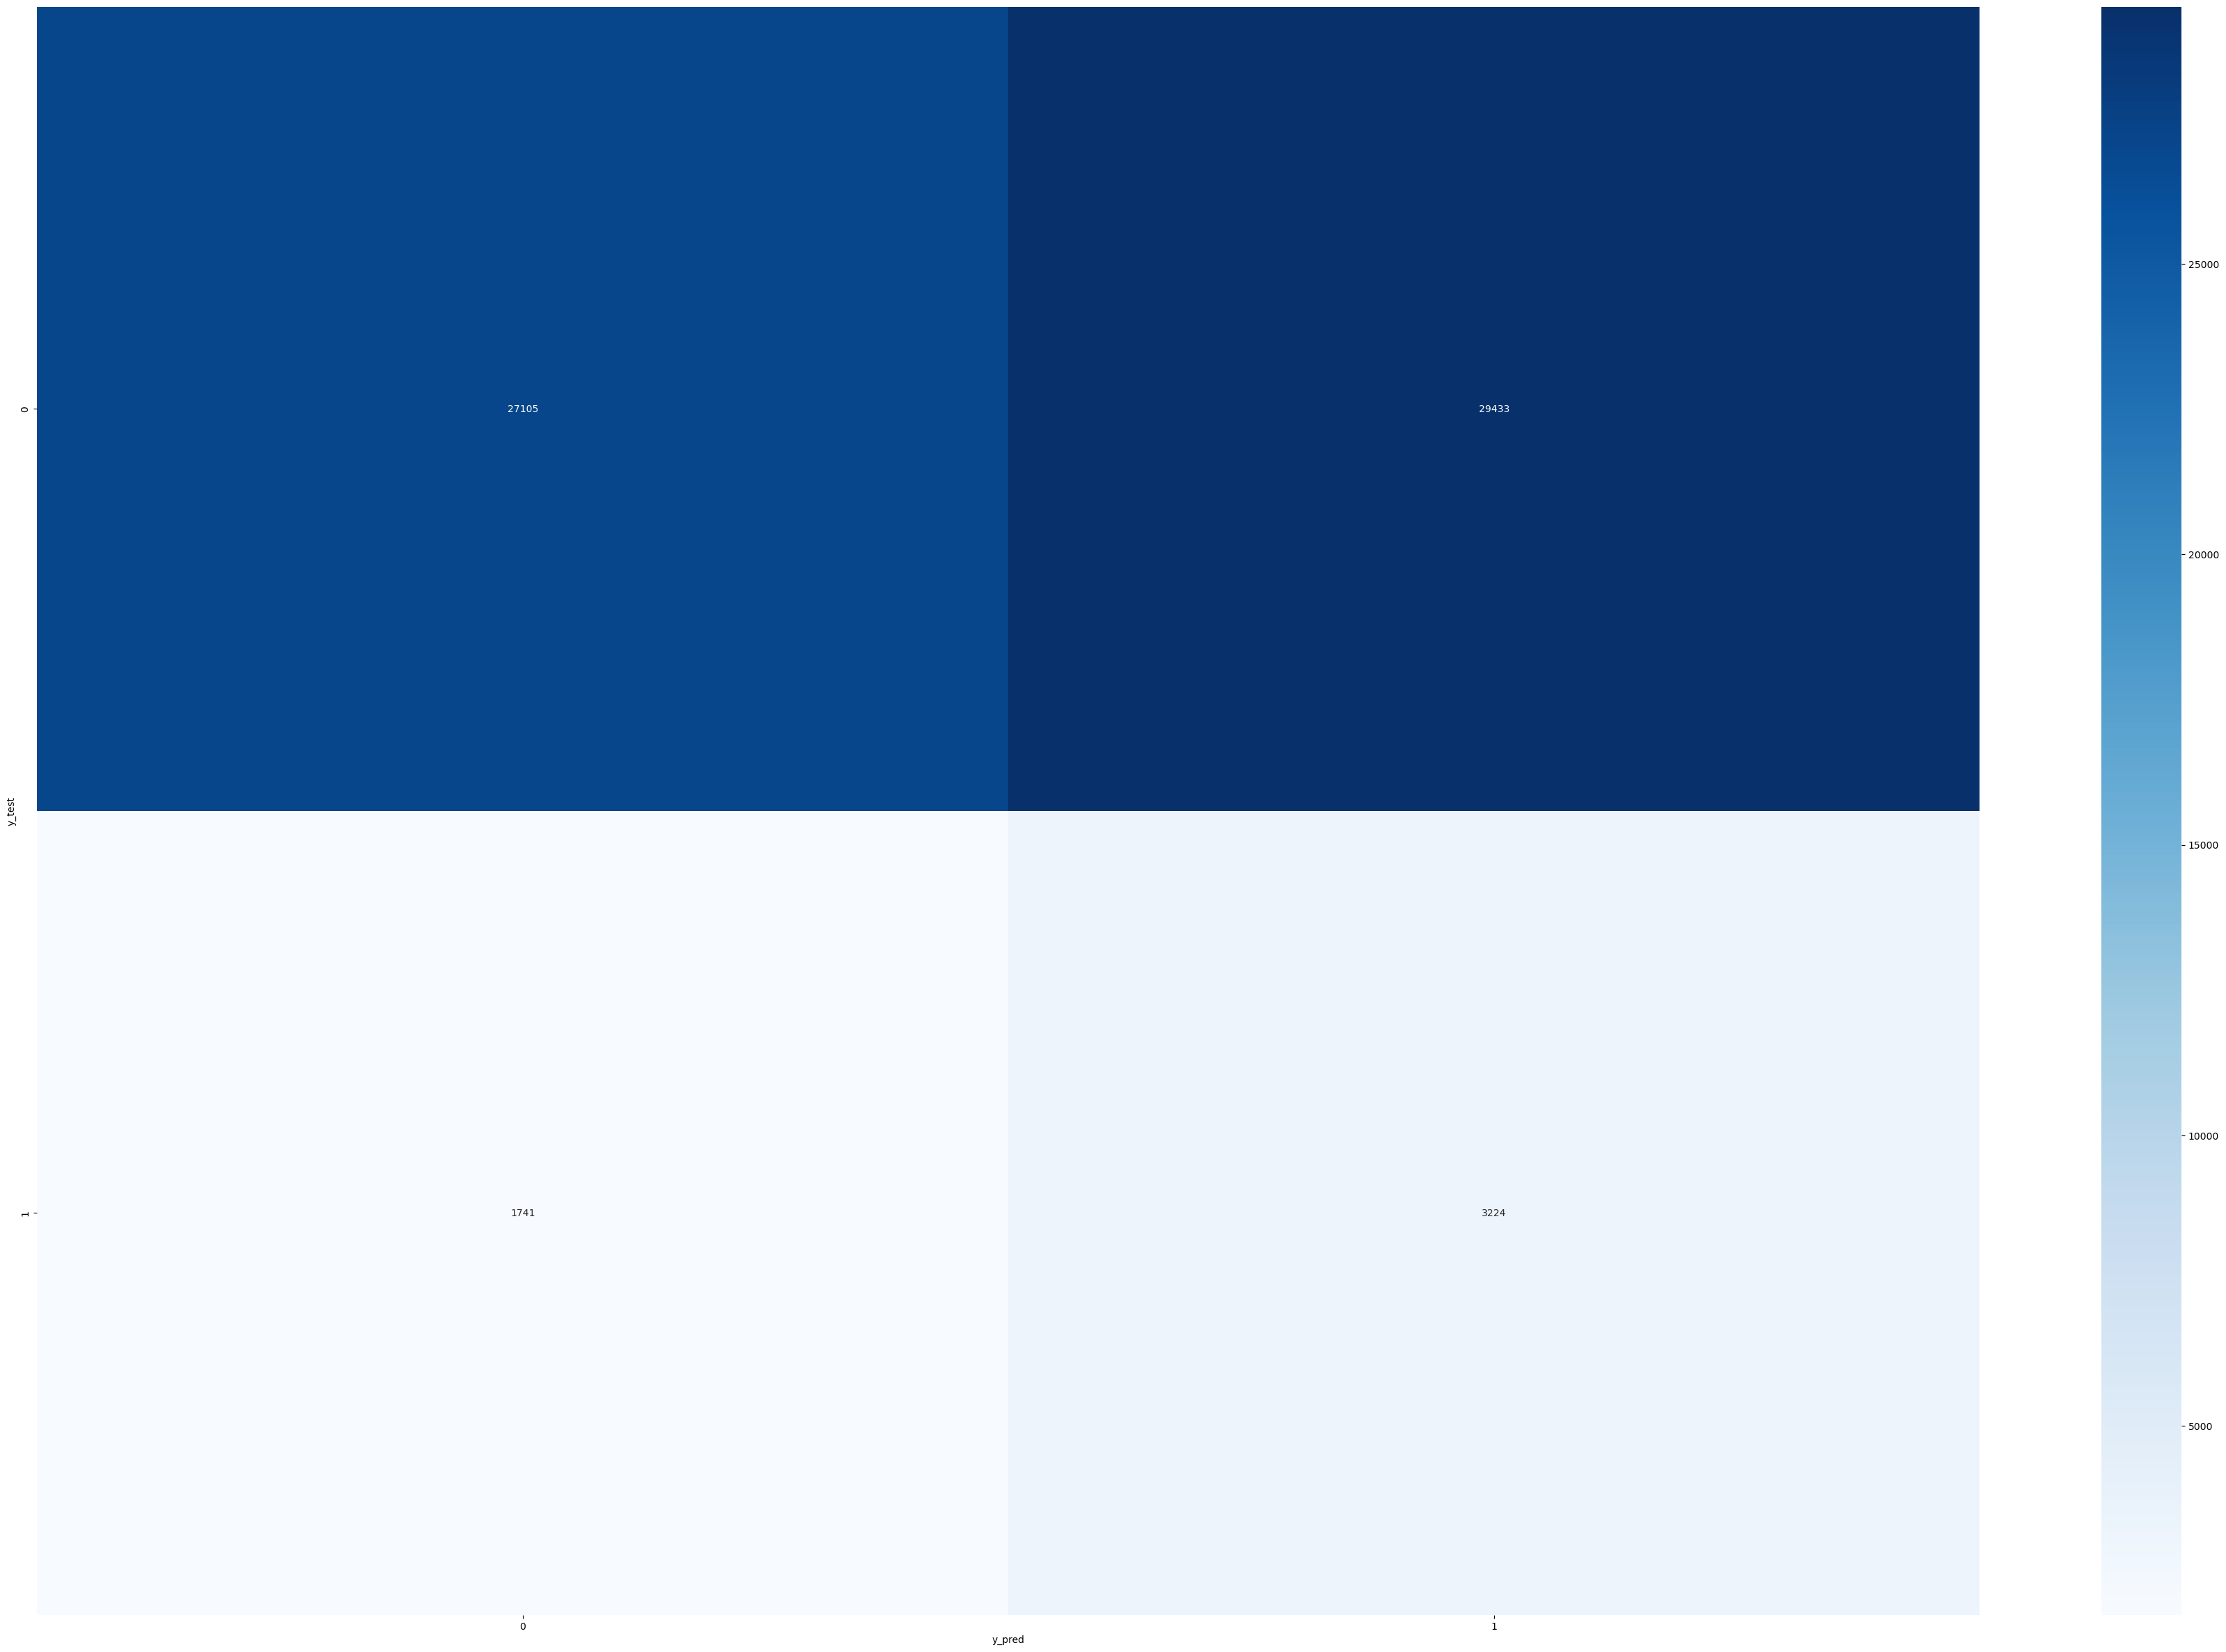

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(45,30))

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [39]:
y_train.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

# Modelling II

In [74]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model.predict_proba(X_test)[:, 1]

In [71]:
y_pred


array([0.07218254, 0.10176376, 0.07791407, ..., 0.08991324, 0.06496197,
       0.08086982])

In [43]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

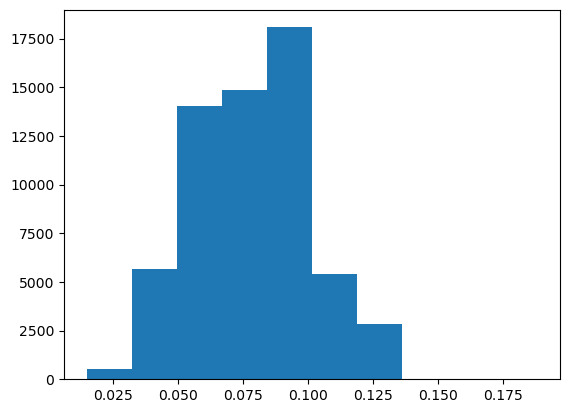

In [44]:
# distribusi predicted probability
plt.hist(y_pred);

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [59]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.08246375116736183

In [79]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.082).astype(int)

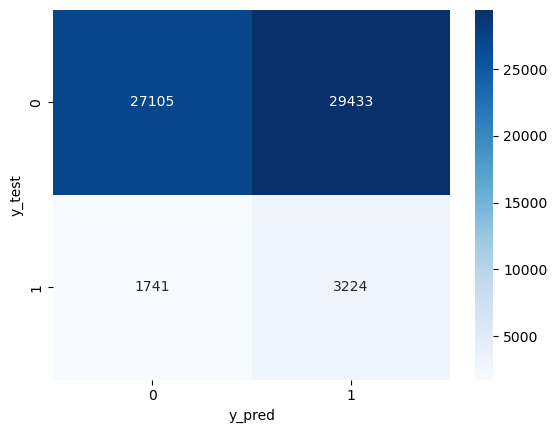

In [48]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [50]:
model.coef_

array([[-0.19782611, -0.01910719, -1.1893084 ,  0.50832308,  0.23759661,
        -0.3596254 , -0.272536  , -0.03641245,  0.64089245,  0.52886074,
        -0.2824769 ,  0.4508256 ,  0.2312299 ,  0.2312299 ,  0.16141501,
         0.36884698,  0.15723333, -0.05282481, -0.11993757, -0.02078419,
        -1.02278568, -0.940495  , -1.09383018, -0.65323875, -0.86430586,
        -0.47098342, -0.35594028,  0.70881525,  1.02711684]])

In [51]:
model.intercept_

array([-1.6662177])

In [52]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,-0.197826,-0.019107,-1.189308,0.508323,0.237597,-0.359625,-0.272536,-0.036412,0.640892,0.528861,...,-0.020784,-1.022786,-0.940495,-1.09383,-0.653239,-0.864306,-0.470983,-0.35594,0.708815,1.027117


In [53]:
X_train.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
181648,0,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229245,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
122525,0,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
306311,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
300658,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.49314667577191357

In [82]:
col_need_to_clean.

TypeError: list.count() takes exactly one argument (0 given)